# Laboratorio 1
Héctor Alejandro Aragón-
22001217-
IIO-
Post Grado en Analisis de Datos-

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Problema 1:
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:
Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojos y verde.
Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verdes y azul.
Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azules yrojo.


In [7]:
def activar_canales_color(imagen, color):
    # Leer la imagen y asegurarse de que esté en el espacio de color BGR
    img_bgr = cv2.imread(imagen)

    # Mascaras de color
    mask_blue = np.zeros_like(img_bgr)
    mask_green = np.zeros_like(img_bgr)
    mask_red = np.zeros_like(img_bgr)

    if color == 1:  # Azul
        mask_blue[:, :, 0] = img_bgr[:, :, 0]  # Canal 1
    elif color == 2:  # Verde
        mask_green[:, :, 1] = img_bgr[:, :, 1]  # Canal 2
    elif color == 3:  # Rojo
        mask_red[:, :, 2] = img_bgr[:, :, 2]  # Canal 3
    elif color == 10:  # Rojo y Verde
        mask_red[:, :, 2] = img_bgr[:, :, 2]  # Canal 3
        mask_green[:, :, 1] = img_bgr[:, :, 1]  # Canal 2
    elif color == 20:  #Verde y Azul
        mask_green[:, :, 1] = img_bgr[:, :, 1]  # Canal 2
        mask_blue[:, :, 0] = img_bgr[:, :, 0]  # Canal 1
    elif color == 30:  # Azul y Rojo
        mask_blue[:, :, 0] = img_bgr[:, :, 0]  # Canal 1
        mask_red[:, :, 2] = img_bgr[:, :, 2]  # Canal 3

    # Combinar las máscaras para obtener la imagen con los canales de color activos
    img_activos = cv2.bitwise_or(cv2.bitwise_or(mask_blue, mask_green), mask_red)

    return img_activos

# Aplicacion
imagen_entrada = 'p1.jpg'  # Reemplaza 'ruta_de_la_imagen.jpg' por la ruta de tu imagen
color_a_mostrar = 30  # Cambiar el valor de color según la opción deseada

imagen_resultante = activar_canales_color(imagen_entrada, color_a_mostrar)

# Resultado
cv2.imshow('Imagen Resultante', imagen_resultante)
cv2.waitKey(0)
cv2.destroyAllWindows()


Problema 2:
En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color.


In [10]:
def resize_and_construir_imagen_color(gray_blue, gray_red, gray_green):
    # Leer imagenes Originales
    img_gray_blue = cv2.imread(gray_blue, cv2.IMREAD_GRAYSCALE)
    img_gray_red = cv2.imread(gray_red, cv2.IMREAD_GRAYSCALE)
    img_gray_green = cv2.imread(gray_green, cv2.IMREAD_GRAYSCALE)

    # Obtener las dimensiones de la imagen más chiquita
    min_height = min(img_gray_blue.shape[0], img_gray_red.shape[0], img_gray_green.shape[0])
    min_width = min(img_gray_blue.shape[1], img_gray_red.shape[1], img_gray_green.shape[1])

    # Redimensionar e igualar a la mas chiquita
    img_gray_blue_resized = cv2.resize(img_gray_blue, (min_width, min_height))
    img_gray_red_resized = cv2.resize(img_gray_red, (min_width, min_height))
    img_gray_green_resized = cv2.resize(img_gray_green, (min_width, min_height))

    # Aray 3d
    img_gray_original = np.stack([img_gray_blue_resized, img_gray_green_resized, img_gray_red_resized], axis=-1)

    # Nueva Matriz
    img_color = np.zeros_like(img_gray_original)

    # Asignar los valores de los canales de color correspondientes
    img_color[:,:,0] = img_gray_original[:,:,0]  # Canal azul
    img_color[:,:,1] = img_gray_original[:,:,1]  # Canal verde
    img_color[:,:,2] = img_gray_original[:,:,2]  # Canal rojo

    return img_color

# Ejemplo de uso
gray_blue_path = 'p2_b.jpg'    # Reemplaza 'gray_blue.png' por la ruta de tu imagen Gray-blue
gray_red_path = 'p2_r.jpg'      # Reemplaza 'gray_red.png' por la ruta de tu imagen Gray Red
gray_green_path = 'p2_g.jpg'  # Reemplaza 'gray_green.png' por la ruta de tu imagen Grey Green

imagen_a_color = resize_and_construir_imagen_color(gray_blue_path, gray_red_path, gray_green_path)

# Mostrar la imagen resultante
cv2.imshow('Imagen a Color', imagen_a_color)
cv2.waitKey(0)
cv2.destroyAllWindows()



Problema 3:
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.


In [12]:
def crear_escala_grises_tridimensional(imagen):
    # Leer orginal
    img_color = cv2.imread(imagen)

    # tran
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Obtener los canales de color por separado
    blue_channel, green_channel, red_channel = cv2.split(img_color)

    return img_gray, blue_channel, green_channel, red_channel

# Ejemplo de uso
imagen_path = 'p3.jpg'  # Reemplaza 'ruta_de_la_imagen.jpg' por la ruta de tu imagen a color

gray, blue, green, red = crear_escala_grises_tridimensional(imagen_path)

# Mostrar las imágenes resultantes en escala de grises
cv2.imshow('Imagen en Gris', gray)
cv2.imshow('Canal Azul', blue)
cv2.imshow('Canal Verde', green)
cv2.imshow('Canal Rojo', red)
cv2.waitKey(0)
cv2.destroyAllWindows()



Problema 4:
Cree una función que, dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.


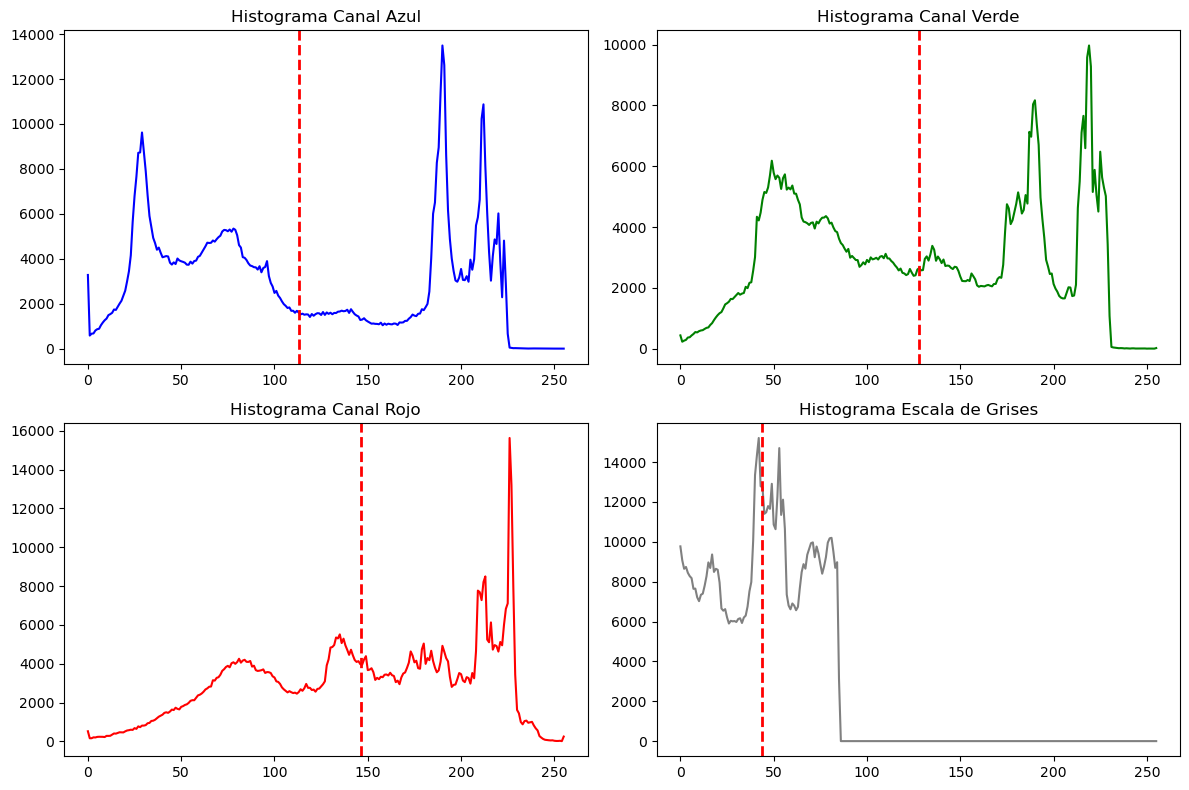

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def mostrar_histograma_con_media(imagen):
    # Leer la imagen
    img = cv2.imread(imagen)

    # Convertir la imagen a escala de grises utilizando el promedio aritmético
    img_gray = np.mean(img, axis=2, dtype=np.uint8)

    # Obtener los canales de color 
    blue_channel, green_channel, red_channel = cv2.split(img)

    # Calcular los histogramas de cada canal y escala de grises
    hist_blue, _ = np.histogram(blue_channel, bins=256, range=(0, 256))
    hist_green, _ = np.histogram(green_channel, bins=256, range=(0, 256))
    hist_red, _ = np.histogram(red_channel, bins=256, range=(0, 256))
    hist_gray, _ = np.histogram(img_gray, bins=256, range=(0, 256))

    # Calcular el valor de la media para cada canal y escala de grises
    media_blue = np.mean(blue_channel)
    media_green = np.mean(green_channel)
    media_red = np.mean(red_channel)
    media_gray = np.mean(img_gray)

    # Crear los gráficos para los histogramas
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Histograma del canal azul
    axs[0, 0].plot(hist_blue, color='blue')
    axs[0, 0].axvline(media_blue, color='red', linestyle='dashed', linewidth=2)
    axs[0, 0].set_title('Histograma Canal Azul')

    # Histograma del canal verde
    axs[0, 1].plot(hist_green, color='green')
    axs[0, 1].axvline(media_green, color='red', linestyle='dashed', linewidth=2)
    axs[0, 1].set_title('Histograma Canal Verde')

    # Histograma del canal rojo
    axs[1, 0].plot(hist_red, color='red')
    axs[1, 0].axvline(media_red, color='red', linestyle='dashed', linewidth=2)
    axs[1, 0].set_title('Histograma Canal Rojo')

    # Histograma de escala de grises
    axs[1, 1].plot(hist_gray, color='gray')
    axs[1, 1].axvline(media_gray, color='red', linestyle='dashed', linewidth=2)
    axs[1, 1].set_title('Histograma Escala de Grises')

    # Ajustar los márgenes para evitar cortar las etiquetas
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

# Aplicación
imagen_path = 'p3.jpg'  # Reemplaza 'ruta_de_la_imagen.jpg' por la ruta de tu imagen

mostrar_histograma_con_media(imagen_path)


### Problema 5: Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacer con un archivo PDF.

El espacio de color HSV (Hue, Saturation, Value) es un modelo de representación de colores que se basa en tres componentes principales: matiz (Hue), saturación (Saturation) y valor (Value). Este espacio de color es muy utilizado en aplicaciones de procesamiento de imágenes y visión por computadora debido a su facilidad para describir y manipular colores de manera intuitiva.

1. Matiz (Hue): Representa el tipo de color, como rojo, verde, azul, amarillo, etc. El matiz se mide en grados, y su rango típico es de 0 a 360°. El valor 0° corresponde al rojo, 120° al verde y 240° al azul, mientras que los valores intermedios representan las transiciones entre estos colores.

2. Saturación (Saturation): Indica la intensidad o pureza del color. Una saturación alta significa un color puro e intenso, mientras que una saturación baja representa colores más desaturados, como tonos de gris. La saturación se mide en porcentaje, donde 0% significa blanco (desaturado) y 100% significa el color más puro e intenso.

3. Valor (Value): Es el brillo o la intensidad de la luz que tiene el color. Un valor alto significa que el color es más brillante, mientras que un valor bajo representa colores más oscuros. El valor también se mide en porcentaje, donde 0% representa negro (sin brillo) y 100% el color con todo su brillo.

El espacio de color HSV forma un cono tridimensional, donde la altura representa el valor (brillo), el ángulo en el plano horizontal representa el matiz (tipo de color), y la distancia al eje vertical en el plano horizontal representa la saturación (intensidad del color).

El mapeo de colores a este espacio implica convertir las componentes RGB (rojo, verde y azul) de un color a las componentes HSV (matiz, saturación y valor). Para ello, se utilizan fórmulas matemáticas específicas que realizan la conversión entre los dos espacios de color.

Aunque la transformación exacta puede variar ligeramente según la implementación, la idea general es la siguiente:

1. Normalizar los valores RGB para que estén en el rango de 0 a 1 (dividiendo cada componente por 255).
2. Calcular el matiz (Hue) a partir de los valores normalizados de R, G y B.
3. Calcular la saturación (Saturation) como la diferencia entre el valor máximo y mínimo de los valores normalizados de R, G y B.
4. Calcular el valor (Value) como el valor máximo de los valores normalizados de R, G y B.

Una vez que se obtienen las componentes HSV, se puede mapear el color a dicho espacio y realizar operaciones de manipulación de colores de manera más intuitiva, como cambiar la saturación, el brillo o el tipo de color sin afectar otros componentes.